# Deep-dive into GRM report

we'll review the computations presented in the GRM report.

# but first review topics from last time...

## what is risk ?
* risk = uncertainity
* measured as   
* volatility = standard deviation 
* = sqrt variation
* of tracking error, which is 
* the difference between portfolio 
* and benchmark returns

# Intution Test

## Let's say, the portfolio has

Systematic risk: 65 bps 

Idiosyncratic risk: 32 bps  

Default risk: 3 bps

What is the total risk?  How much of it is contributed by systematic factors?

In [4]:
import math
tev=math.sqrt(65**2+32**2+3**2)
print("%.2f" % tev)

72.51


In [10]:
# tev^2 = sys^2 + idio^2 + default^2
# tev = sys^2/tev + idio^2/tev + default^2/tev

print("Sys Cont: %.2f\nIdio Cont: %.2f\nDefault Cont: %.2f" % (65**2/tev,32**2/tev,3**2/tev))

Sys Cont: 58.27
Idio Cont: 14.12
Default Cont: 0.12


In [11]:
# verify
58.3+14.1+0.12

# these components are called "Contribution to TEV" and have the nice 
# property of being additive.

72.52

# We're not going into these topics

* Tail Risk
* Hedging
* BiDS/Long-run Mean Reversion
* Risk/Beta Attribution
* Relative Risk
* Basket Expansion
* Factor Based Scenarios
* Details of Default Risk
* Risk Attribution
* Details for Security/Factor Partition

## Final Introduction

for a security $S$ loading into two factors

$$
\text{TEV}^2(S) = \beta_1^2\sigma_1^2 + \beta_2^2\sigma_2^2 + 2\beta_1\beta_2 \sigma_{12} + \sigma_{\epsilon}^2  \\
$$

## now in matrix notation

$$
\text{TEV}^2(S) = 
\begin{bmatrix}
    \beta_1  \beta_2
\end{bmatrix}
 \begin{bmatrix}
    \sigma_1^2 & \sigma_{12} \\
    \sigma_{12} & \sigma_2^2 
\end{bmatrix}\begin{bmatrix}
    \beta_1  \\
    \beta_2
\end{bmatrix}
+
\sigma_{\epsilon}^2
\\
= l'\Sigma l+\sigma_{\epsilon}^2
$$



We considered the non-systematic component as one, in GRM we separate it into idiosyncratic and default risk. 

Now considering a portfolio with security weights given as the vector $w$


$$
\text{TEV}^2(P) = w_p' L '\Sigma L w_p + I_p + D_p
$$


where $L$ is the loading matrix and $I_p$ is the (block) diagonal matrix for idiosyncratic variance and $D_p$ is the default variance.

Similar equations can be written for benchmark and the net (portfolio - benchmark) universes using $w_b$ and $w_n=w_p-w_b$ as the weight vectors.

## GRM report is mainly presenting this equation in various forms and shapes...

# Finally! Let's look at a sample GRM report

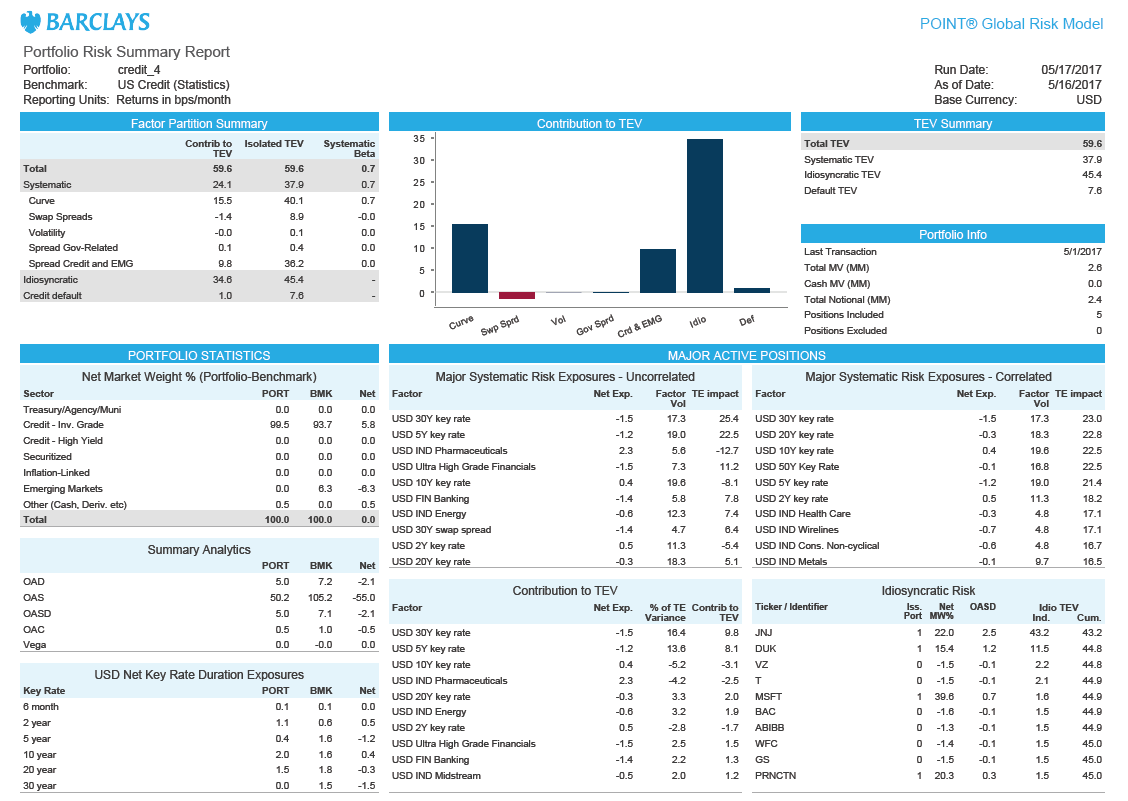

In [1]:
from IPython.display import Image
Image("summary.png")

# Porfolio Risk Summary report

This report is too detailed and derived from other reports, we'll come back to it when we discuss the components that make it up first

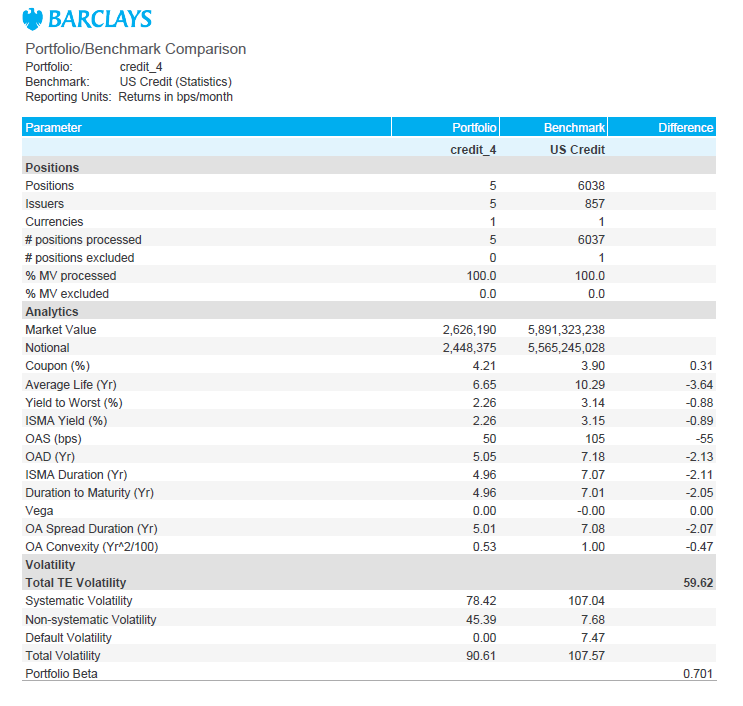

In [2]:
Image("comparison.png")

# Portfolio/Benchmark Comparison report

The only interesting part is perhaps the *Portfolio Beta* information.

Remember from the linear regression that $\beta_P=\frac{\text{Cov}(P,B)}{\text{Var}(B)}$

We don't know how to compute $\text{Cov}(P,B)$? 

However, we have all what is needed.  Consider

$$
\text{Var}(N)=\text{Var}(P-B)
= \mathbf{E}{(P-B)^2} \\
= \mathbf{E}(P^2+B^2-2PB) \\
=\text{Var}(P)+\text{Var}(B)-2\text{Cov}(P,B)
$$

from which we can write
$$\beta_P=\frac{\text{Var}(P)+\text{Var}(B)-\text{Var}(N)}{2\text{Var}(B)}$$



## Let's try for the values (without even using a calculator)

$$
\beta_P = \frac{90^2+107^2-60^2}{2* 107^2} = \frac{(90-60)(90+60)}{2* 107^2}+0.5 \\
   \approx 0.5 + \frac{15* 150}{100^2 + 2* 7* 100} = 0.5 + \frac{45}{200+28}  
   \approx \ 0.5 + \frac{45}{200+25}  \\
   = 0.5+0.2 = 0.7
   $$

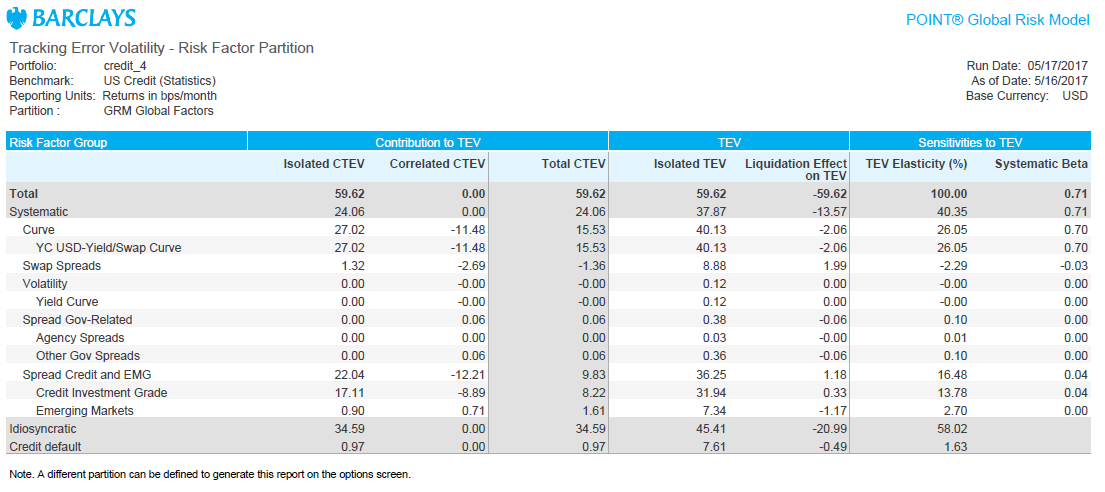

In [3]:
Image("factor_partition.png")

# TEV - Risk Factor Partition report

Note that we can add squares of the components of TEV, this creates some useabiliy challenges.  Here we are going to see a new term *CTEV*, contribution to TEV, where the saw that the terms are additive.

To simplify the equations, let's combine the weights of securities and factor loadings into one vector $w$: **exposure**.

The part of the TEV due to factors, which is Systematic TEV, writing in matrix notation

$$
\text{Systematic TEV}= \sqrt{w' \Sigma w}
$$

$$
\text{TEV}_{\text{sys}}^2 =
\begin{bmatrix}
    w_1  w_2
\end{bmatrix}
 \begin{bmatrix}
    \sigma_1^2 & \sigma_{12} \\
    \sigma_{12} & \sigma_2^2 
\end{bmatrix}
\begin{bmatrix}
    w_1  \\
    w_2
\end{bmatrix} \\
= (w_1^2\sigma_1^2+w_1 w_2 \sigma_{12})+(w_1 w_2 \sigma_{12}+w_2^2\sigma_2^2)  \\
= \text{TEV}_1^2 + \text{TEV}_2^2
$$

Let's divide both sides with *TEV*

$$
\text{TEV}_\text{sys} = \text{CTEV}_1+\text{CTEV}_2
$$

Note further that, each $CTEV$ has two components, one only depends on one factor (isolated) and the other correlated to other factors.  To emphasize it further, we'll call is *TotalCTEV*.

$$
\text{TotalCTEV} = \text{IsoCTEV} + \text{CorrCTEV}
$$

more visually

\begin{bmatrix}
     \text{IsoCTEV}_1 & \text{CorrCTEV}_1 \\
     \text{CorrCTEV}_2 & \text{IsoCTEV}_2 
\end{bmatrix}



## Liquidation Effect
or more accurately *hedging* effect, since unlike securities, it's not practical to liquidate factors.  The difference in TEV, when the exposure of the factor **f** is zero (or completely hedged)

$$
\text{TEV}_{-f}^2 = \text{TEV}^2 - (\text{TEV}_f^2 + \text{CorrTEV}_f) \\
\text{TEV}_{-f}^2 = \text{TEV}(\text{TEV} - \text{CTEV}_f - \text{CorrCTEV}_f)
$$

Therefore, Liquidation Effect of factor **f** is $\text{TEV}_{-f}-\text{TEV}$


## TEV Elasticity

Definition is

$$
\frac{\% \Delta \text{TEV}}{\% \Delta w_i} = \frac{\partial \text{TEV}/TEV}{\partial w_i/w_i} 
= \frac{\partial \text{TEV}}{\partial w_i} \frac{w_i}{\text{TEV}} \\
= \frac{\text{MC}_i w_i }{\text{TEV}}
= \frac{\text{CTEV}_i}{\text{TEV}}
$$

# Marginal Contribution details

Let $y=x'Ax$ where $y,x$ are vectors and $A$ is symmetric matrix of the matching dimensions.  This is a quadratic equation in matrix form, similar to $y=ax^2$.  The (partial) derivative of $y$ to one of the $x$ elements $x_1$ can be computed as:

$$ y = a_{11}x_1^2 + 2a_{12}x_1x_2 + 2a_{13}x_1x_3 + \dots + a_{22}x_2^2 + \dots + a_{nn}x_n^2$$

$$
\frac{\partial y}{\partial x_1} = 2a_{11}x_1 + 2a_{12}x_2 + \dots + 2a_{1n}x_n \\
= 2A_1 x
$$

note that this is scalar value.

here $A_1$ is the first row of the $A$ matrix.  Extending this defintion to full derivative and using the convention of column vectors

$$\frac{dy}{dx} = 2Ax $$

We have little more complication due to the square

$$ \text{TEV} = \sqrt {w'\Sigma w} $$

$$ \frac{d \text{TEV}}{d w} = \frac{2\Sigma w}{2\sqrt {w'\Sigma w}} = \frac{\Sigma w}{\text{TEV}} $$

## Systematic Beta
We have seen the portfolio beta (that corresponds to overall risk), now we have the systematic beta

remember that systematic part (due to factors) porfolio returns can be written compactly as $r_p = w_p f$, similarly for benchmark $r_b = w_b f$

$$
\beta_{sys} = \frac{\text{Cov}(r_p,r_b)}{\text{Var}(r_b)} = \frac{w_p'\Sigma w_b}{w_b' \Sigma w_b}
$$

Note that $\Sigma w_b$ (matrix-vector) multiplication needs to be computed once.

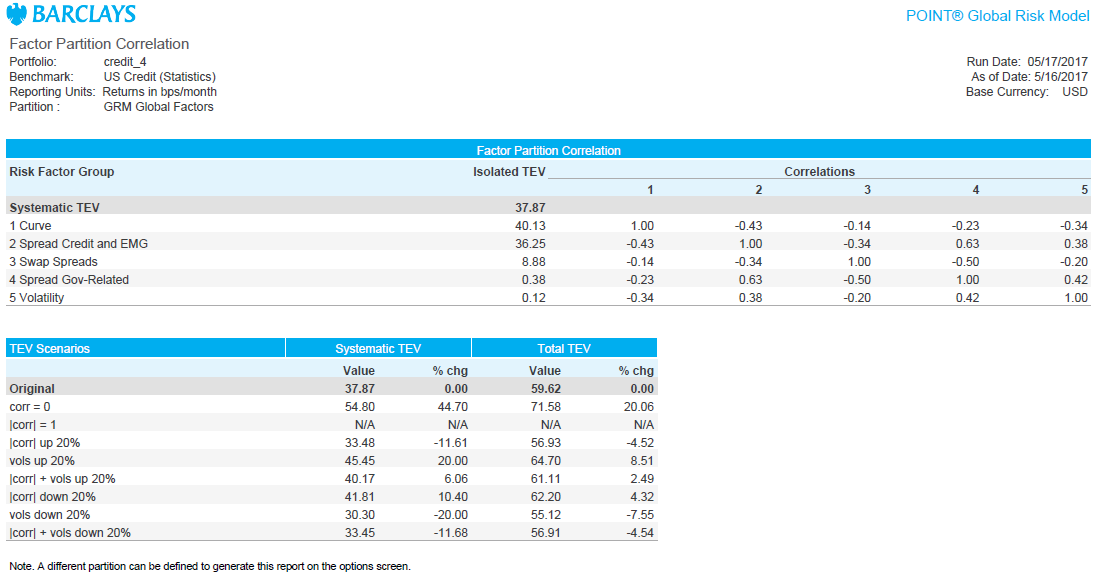

In [4]:
Image("factor_correlation.png")

# Factor Partition Correlation report

correlation of top level factor buckets, sorted by CTEV of each bucket

**Scenarios**
Once we separate covariance matrix as volatility vector and correlations matrix, we can stress test various scenarios on individual components.  The N/A is there once the correlation matrix negative definite.

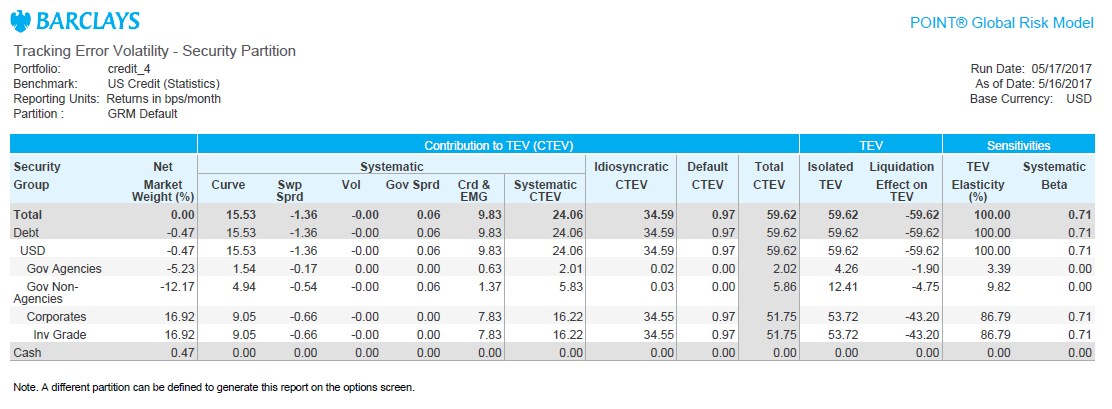

In [5]:
Image("security_partition.png")

# Security Partition Report

same as factor partition, however uses security partition on y-axis as well as factor partition on x-axis.  The definition of the fields are similar...

# Security Partition Correlation report

same as factor partition, however uses security partition buckets

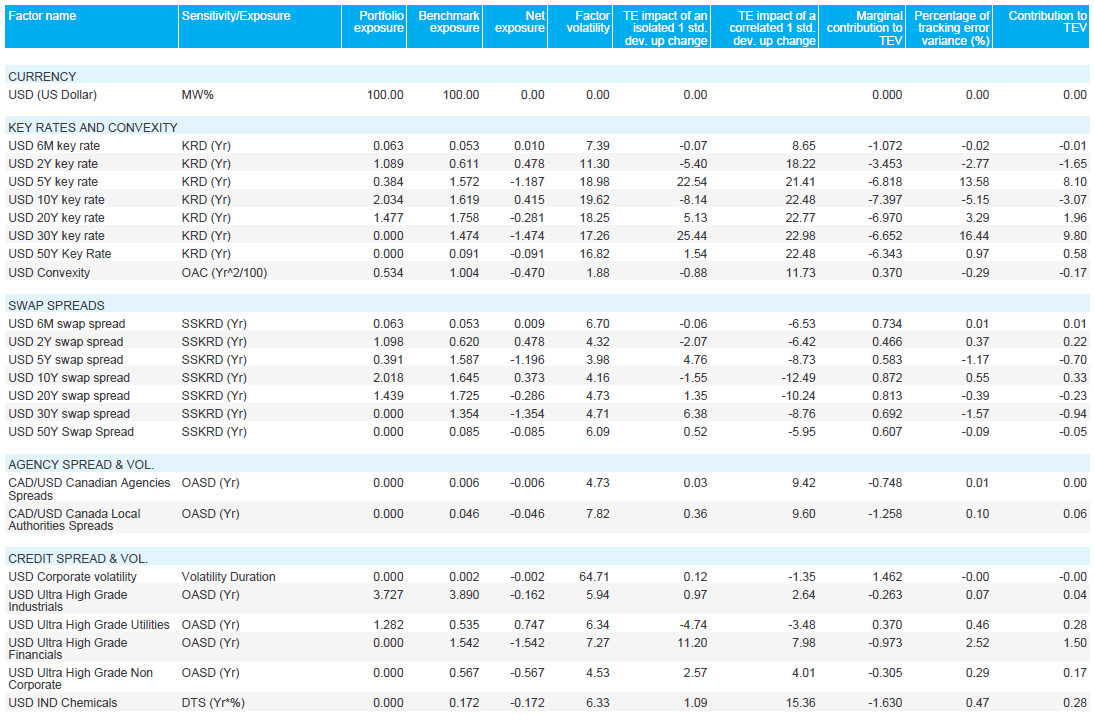

In [6]:
Image("factor_details.png")

# Factor Exposure - Full Details report

*TE Impact of an isolated 1 std dev up change:*  $w_i\sigma_i$

*TE Impact of a correlated 1 std dev up change:* $\Sigma_i w/\sigma_i$

*Marginal Contribution to TEV:* $MC_i = \Sigma_i w/\text{TEV}$

*Percentage of TEV(%) = Elasticity:* $\text{CTEV}_i/\text{TEV}$

*Contribution to TEV (CTEV):* $w_i MC_i$

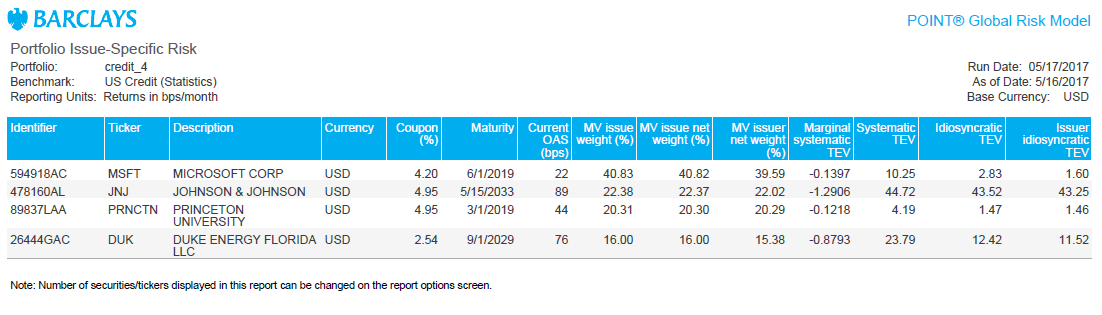

In [7]:
Image("issue_specific.png")

# Portfolio Issue-Specific Risk report


*Marginal Systematic TEV:*  $\frac{\partial \text{TEV}_\text{sys}}{\partial w_i} = \frac{L'\Sigma L w}{\text{TEV}}$

*Systematic TEV:* Systematic risk due to this security in isolation
$w_i \hat{\sigma_i}$, where $\hat{\sigma_i}$ is the i'th diagonal element of the $L'\Sigma L$ matrix (loading scaled covariance matrix)

*Idiosyncratic TEV:*  $\sigma_{\epsilon_i}$  

*Issuer Idiosyncratic TEV:* $\Sigma_{i \in \text{Issuer}}  \sigma_{\epsilon_i}$

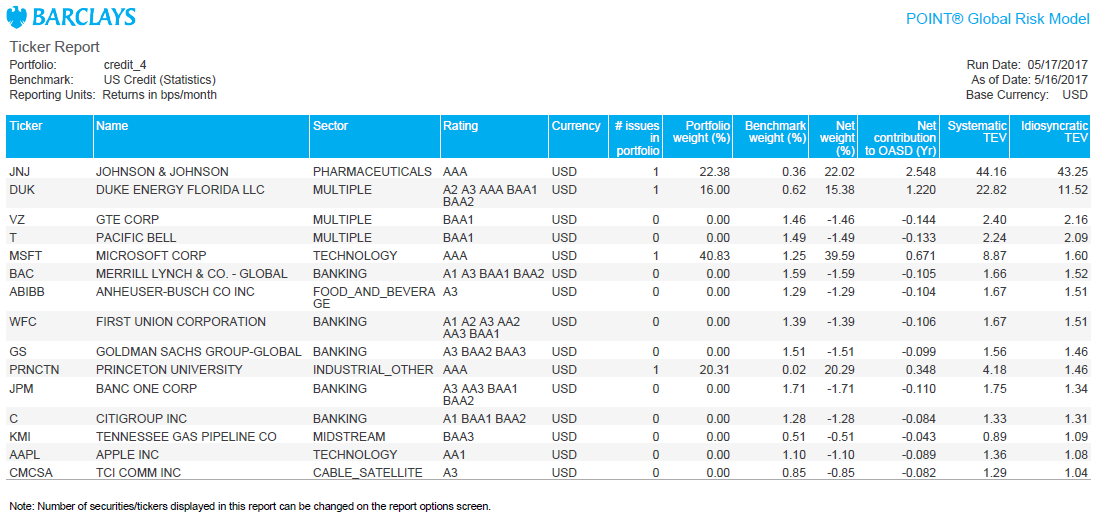

In [8]:
Image("ticker.png")

# Ticker report

Similar to Issue-Specific report but securities are grouped under tickers, so the weights will be different if there are more than one issue under the same ticker, sorting is by *Idiosyncratic TEV*

Note that *Idiosyncratic TEV* column values should match the Issue-Specific report's *Issuer Idiosyncratic TEV* column.

# Credit Default Risk

**Issuer Default Probability:** default probability based on the underlying default prediction model (CDP)

**Loss Given Default:** model driven Conditional Recovery Rate (CRR)

**Isolated Default TEV:**  $ | \text{mv}_i | \sqrt{p(1-p)} \text{LGD}$

**Issuer Isolated Default TEV:** $\Sigma_{i \in \text{Issuer}} \text{Isolated Default TEV}_i$

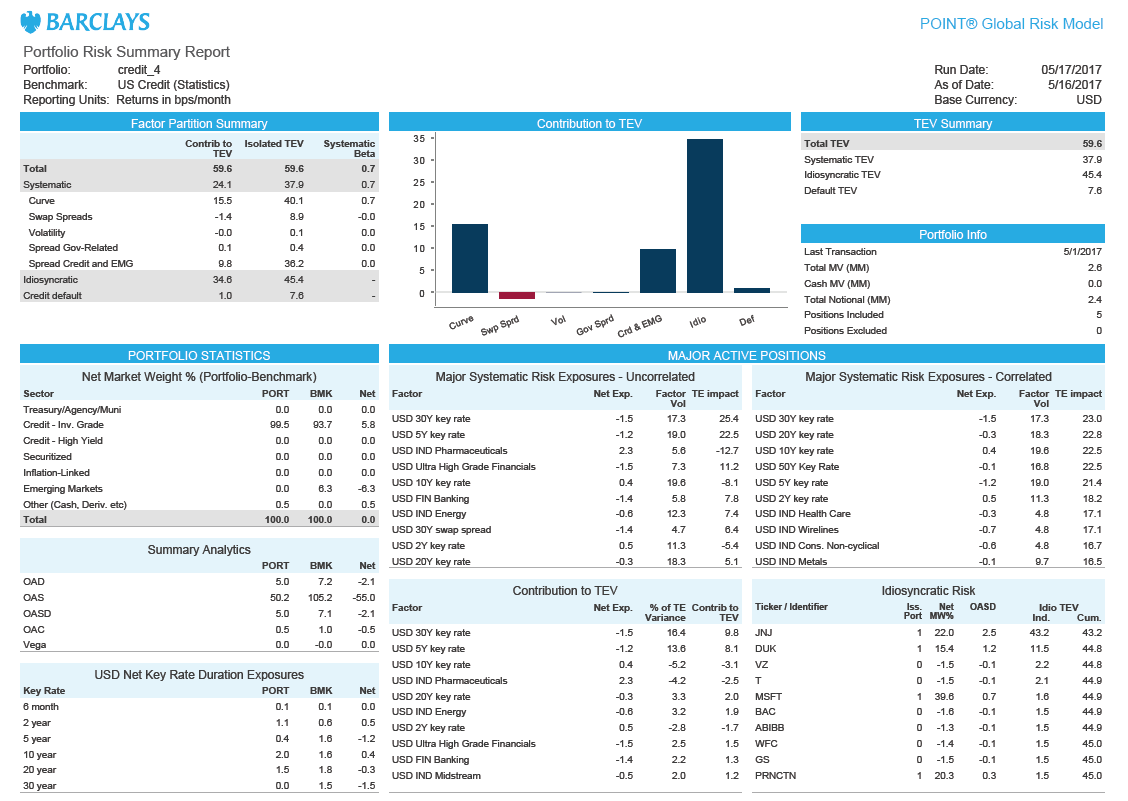

In [9]:
Image("summary.png")

# Portfolio Risk Summary report

* Factor Partition Summary - extract from the Factor Partition report
* Contribution to TEV - graphical view of the same
* TEV Summary
  - Note that $\text{Total TEV}^2 = \text{Systematic TEV}^2 + \text{Idiosyncratic TEV}^2 + \text{Default TEV}^2$

* Porfolio Info - extract from *Comparison* report

* Portfolio Statistics
  - Net Market Weight % (P-B): security partition based on predetermined buckets
  - Summary Analytics: from *Comparison* report
  - USD Net KRD Exposures: from *Factor Exposure* report

* Major Active Positions
  - Major Systematic Risk Exposures - Uncorrelated : from *Factor Exposure* report
  - Major Systematic Risk Exposures - Correlated   : from *Factor Exposure* report
  - Contribution to TEV                            : from *Factor Exposure* report
  - Idiosyncratic Risk                             : from *Ticker* report
    Note that the last column is the cumulative addition of the idio risk. e.g.  $44.8=\sqrt{43.2^2+11.5^2}$ due to independence of idio risk across tickers